In [52]:
%%file fs_pw.m
% f1 = function 1
% f2 = function 2
% K = number of points to integrate to
% T = time period of the function
function[] = fs_pw(f1, f2, K, T, n, precision)
    syms x;
    w = (2*pi)/T;
    n = 1:K;
    
    %% calculate the constants
    a0 = (2/T)*(int(f1, x, 0, pi) + int(f2, x, pi, 2*pi));
    an = (2/T)*(int(f1*cos(n*w*x), x, 0, pi) + int(f2*cos(n*w*x), pi, 2*pi));
    bn = (2/T)*(int(f1*sin(n*w*x), x, 0, pi) + int(f2*sin(n*w*x), pi, 2*pi));
    v1 = [a0, an, bn];
    v2 = [1/2 cos(n*w*x) sin(n*w*x)];
    
    FS = v1.*v2;
    
    %% fouriere transform
    FS = sum(FS);
    FS = vpa(FS);
    
    disp('Fourier Transformed Equation : ');
    disp(FS);
    
    %%x = linspace(0, T, 500);
    %%y = eval(FS);
    %%plot(x, y, 'r');
    fplot(sym(FS), [0 4*pi], 'LineWidth', 2);
    hold on;
    
    g = @(x) f1(x).*(0<=x & x<pi)+f2(x).*(pi<=x & x<2*pi)
    x = linspace(0, 2*pi, 500);
    y = g(x);
    ry = repmat(y, 1, 3);
    rx = linspace(0, 6*pi, length(ry));

    plot(rx, ry, 'LineWidth', 2);
end

Created file 'C:\Users\shadowleaf\MATLAB\fs_pw.m'.


Fourier Transformed Equation : 
0.00058459115919888097560412158297064*cos(33.0*x) + 0.0022028365825867867904252193905018*cos(17.0*x) + 0.00051968961009598480198603135008574*cos(35.0*x) + 0.007859503362562733116455412393272*cos(9.0*x) + 0.00046502539983022745247106530595693*cos(37.0*x) + 0.0017634896741484248820855634455818*cos(19.0*x) + 0.00041855343350925797661596870733401*cos(39.0*x) - 0.50000000000000003091119303756106*sin(2.0*x) - 0.25000000000000001545559651878053*sin(4.0*x) - 0.12500000000000000772779825939026*sin(8.0*x) - 0.062500000000000003863899129695132*sin(16.0*x) - 0.031250000000000001931949564847566*sin(32.0*x) + 0.025464790894703255297315536154201*cos(5.0*x) - 0.071617582655527842516189994591252*sin(33.0*x) + 0.00037871491515025662250617989521418*cos(41.0*x) - 0.13902236633131875311966293067714*sin(17.0*x) - 0.029411764705882354759481943385945*sin(34.0*x) + 0.0014435822502666244499611981946826*cos(21.0*x) - 0.067525149360926251515264852043181*sin(35.0*x) + 0.000344304906

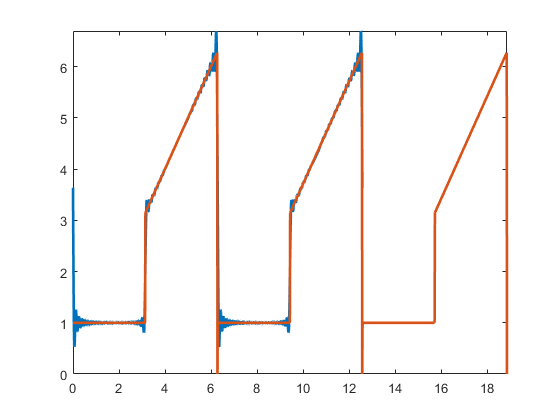

In [2]:
fs_pw(@(x) 1, @(x) x, 50, 2*pi, 100);

Fourier Transformed Equation : 
0.50523429496680180869490708468763*cos(2.0*x) + 0.126447700772227778969266688846*cos(4.0*x) + 0.031623600220121755013734888570355*cos(8.0*x) + 0.0079067087359078327438390556922812*cos(16.0*x) - 0.0070596637069028452846306224213137*cos(17.0*x) - 0.025185964064117909228497315684712*cos(9.0*x) + 0.006247321872034832328650839118166*cos(18.0*x) - 0.0056516814897160567948390085867467*cos(19.0*x) - 1.547238323701381950956302320608*sin(2.0*x) - 0.77299360822328346300706995742397*sin(4.0*x) - 0.38640089157832319295461199867007*sin(8.0*x) - 0.19318761717236028847999738694658*sin(16.0*x) - 0.081581483924437506232960684188832*cos(5.0*x) + 0.020240085928771612484771952970415*cos(10.0*x) + 0.0050603573493856905388632657756788*cos(20.0*x) + 0.17560498972370314314976934712507*sin(17.0*x) + 0.33046369429273928064105954435993*sin(9.0*x) - 0.17172151569713073920772634198199*sin(18.0*x) - 0.016860701804826842344666805289056*cos(11.0*x) + 0.15716566776261600974294990022346*s

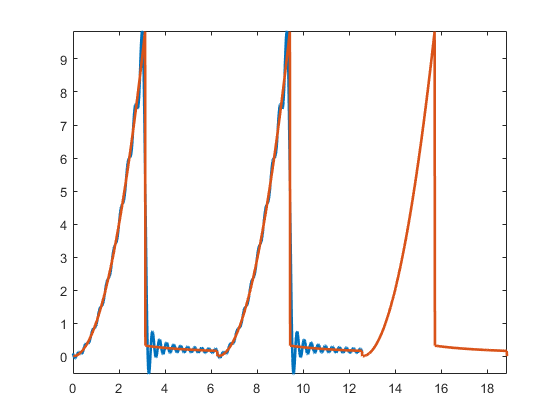

In [3]:
fs_pw(@(x) x.^2, @(x) 1./x, 20, 2*pi, 100);


  File C:\Users\shadowleaf\MATLAB\fs_pw.m, line 29, in fs_pw
Undefined function 'f' for input arguments of type 'double'.



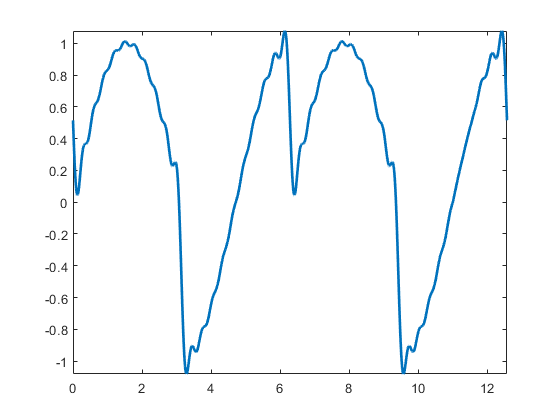

In [48]:
fs_pw(@(x) sin(x), @(x) cos(x), 20, 2*pi, 100);


  File C:\Users\shadowleaf\MATLAB\fs_pw.m, line 29, in fs_pw
Undefined function 'f' for input arguments of type 'double'.



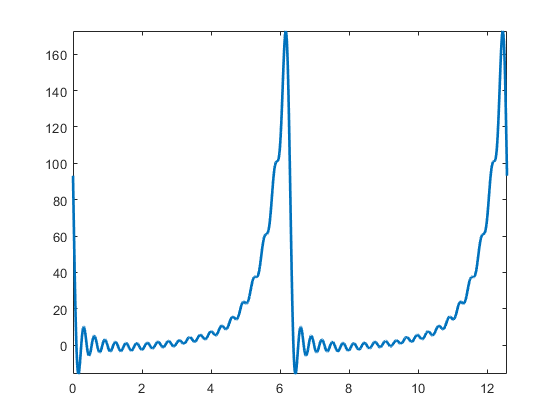

In [49]:
fs_pw(@(x) cos(2*x), @(x) gamma(x), 20, 2*pi, 100);


  File C:\Users\shadowleaf\MATLAB\fs_pw.m, line 29, in fs_pw
Undefined function 'f' for input arguments of type 'double'.



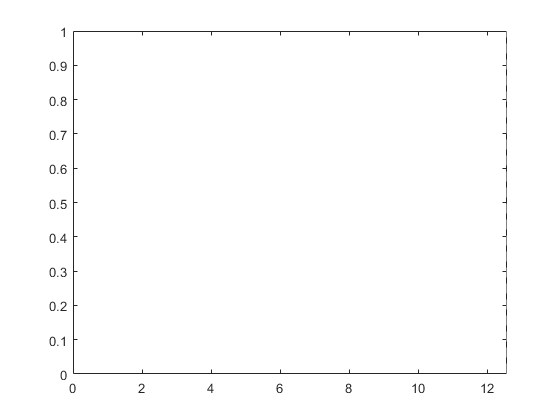

In [50]:
fs_pw(@(x) gamma(x), @(x) 1./x, 20, 2*pi, 100);


  File C:\Users\shadowleaf\MATLAB\fs_pw.m, line 29, in fs_pw
Undefined function 'f' for input arguments of type 'double'.



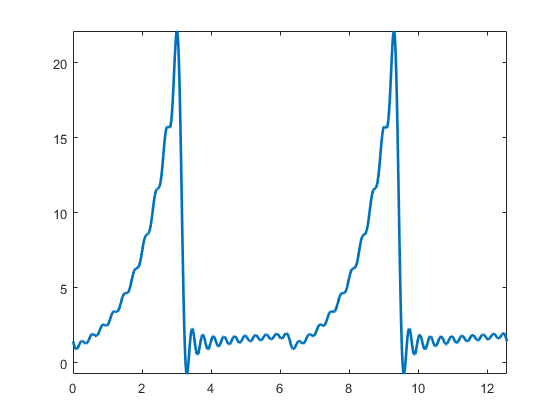

In [51]:
fs_pw(@(x) exp(x), @(x) log(x), 20, 2*pi, 100);

In [1]:
help fft

 FFT Discrete Fourier transform.
    FFT(X) is the discrete Fourier transform (DFT) of vector X.  For
    matrices, the FFT operation is applied to each column. For N-D
    arrays, the FFT operation operates on the first non-singleton
    dimension.
 
    FFT(X,N) is the N-point FFT, padded with zeros if X has less
    than N points and truncated if it has more.
 
    FFT(X,[],DIM) or FFT(X,N,DIM) applies the FFT operation across the
    dimension DIM.
    
    For length N input vector x, the DFT is a length N vector X,
    with elements
                     N
       X(k) =       sum  x(n)*exp(-j*2*pi*(k-1)*(n-1)/N), 1 <= k <= N.
                    n=1
    The inverse DFT (computed by IFFT) is given by
                     N
       x(n) = (1/N) sum  X(k)*exp( j*2*pi*(k-1)*(n-1)/N), 1 <= n <= N.
                    k=1
 
    See also FFT2, FFTN, FFTSHIFT, FFTW, IFFT, IFFT2, IFFTN.

    Reference page in Doc Center
       doc fft

    Other functions named fft

       codistributed/fft